In [3]:
# install.packages('fpp3')
library('fpp3')
library('ggplot2')

#### 1.0. Time Plots

In [11]:
df_ansett = read.csv('../../../data/ansett.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
df_ansett$Week = yearweek(df_ansett$Week)

melsyd_economy = df_ansett |> filter(Airports == 'MEL-SYD', Class == 'Economy') |> 
                           mutate(Passengers = Passengers / 1000)

melsyd_economy = melsyd_economy |> as_tsibble(index = Week)

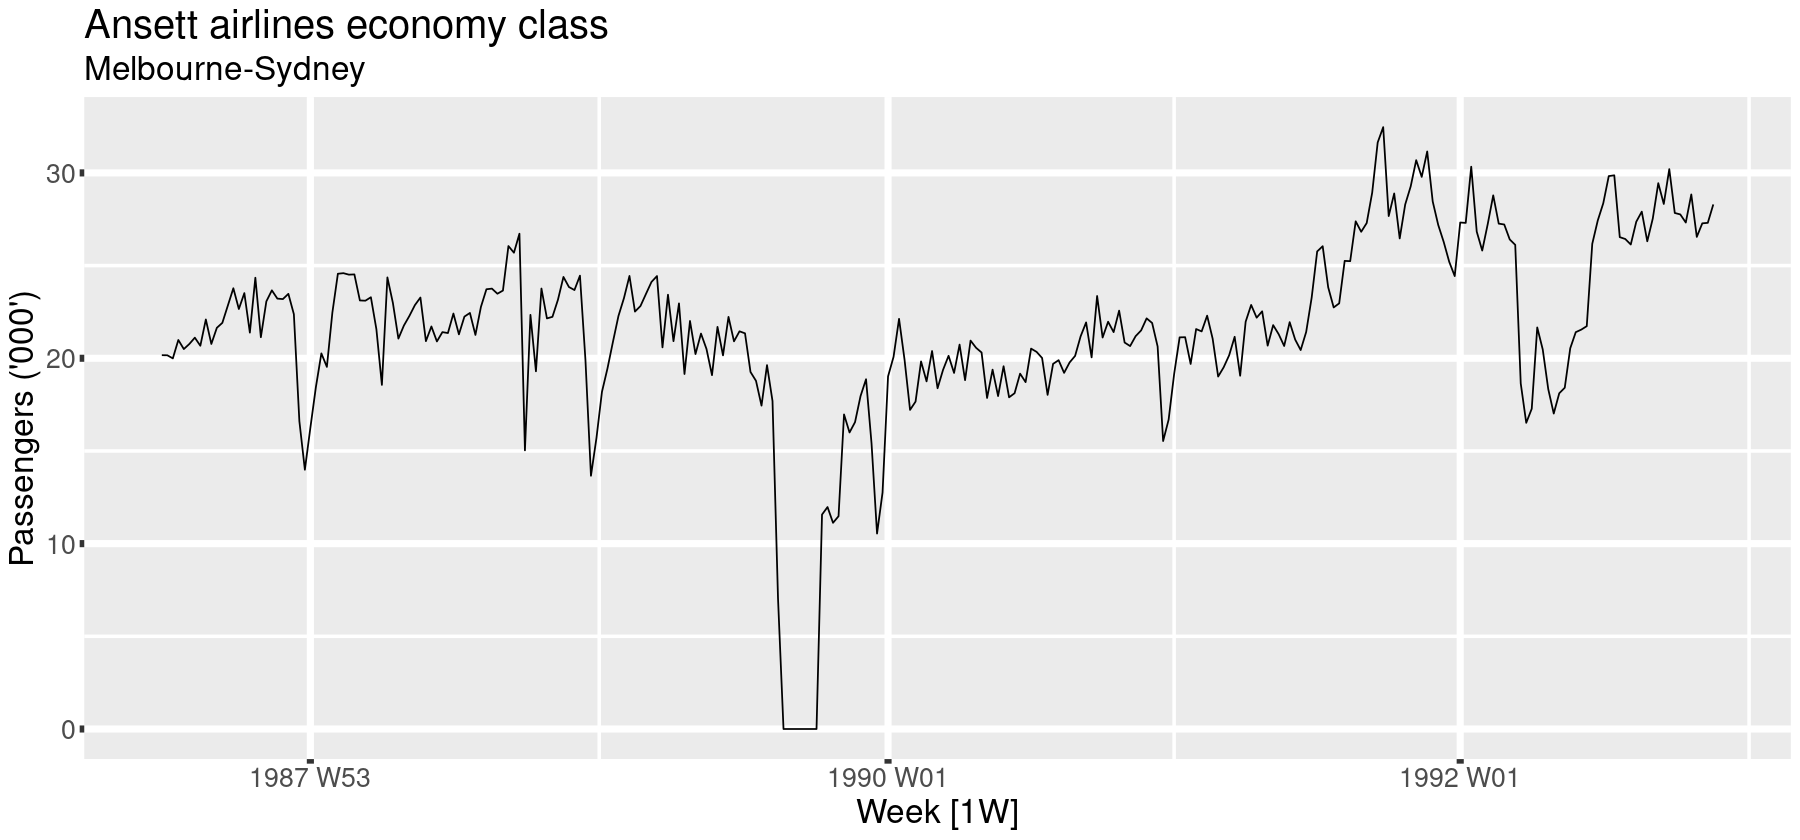

In [14]:
options(repr.plot.width = 15, repr.plot.height = 7)

autoplot(melsyd_economy, Passengers) +
labs(
    title = 'Ansett airlines economy class',
    subtitle = 'Melbourne-Sydney',
    y = "Passengers ('000')"
) +
theme(text = element_text(size = 20), element_line(size = 2))

In [149]:
beer = read.csv("../../../data/aus_production.csv", header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
beer$Quarter = yearquarter(beer$Quarter)

beer = beer |> as_tsibble(index = Quarter)
beer_plot = beer |> select(Quarter, Beer) |> filter(year(Quarter) >= 1992)

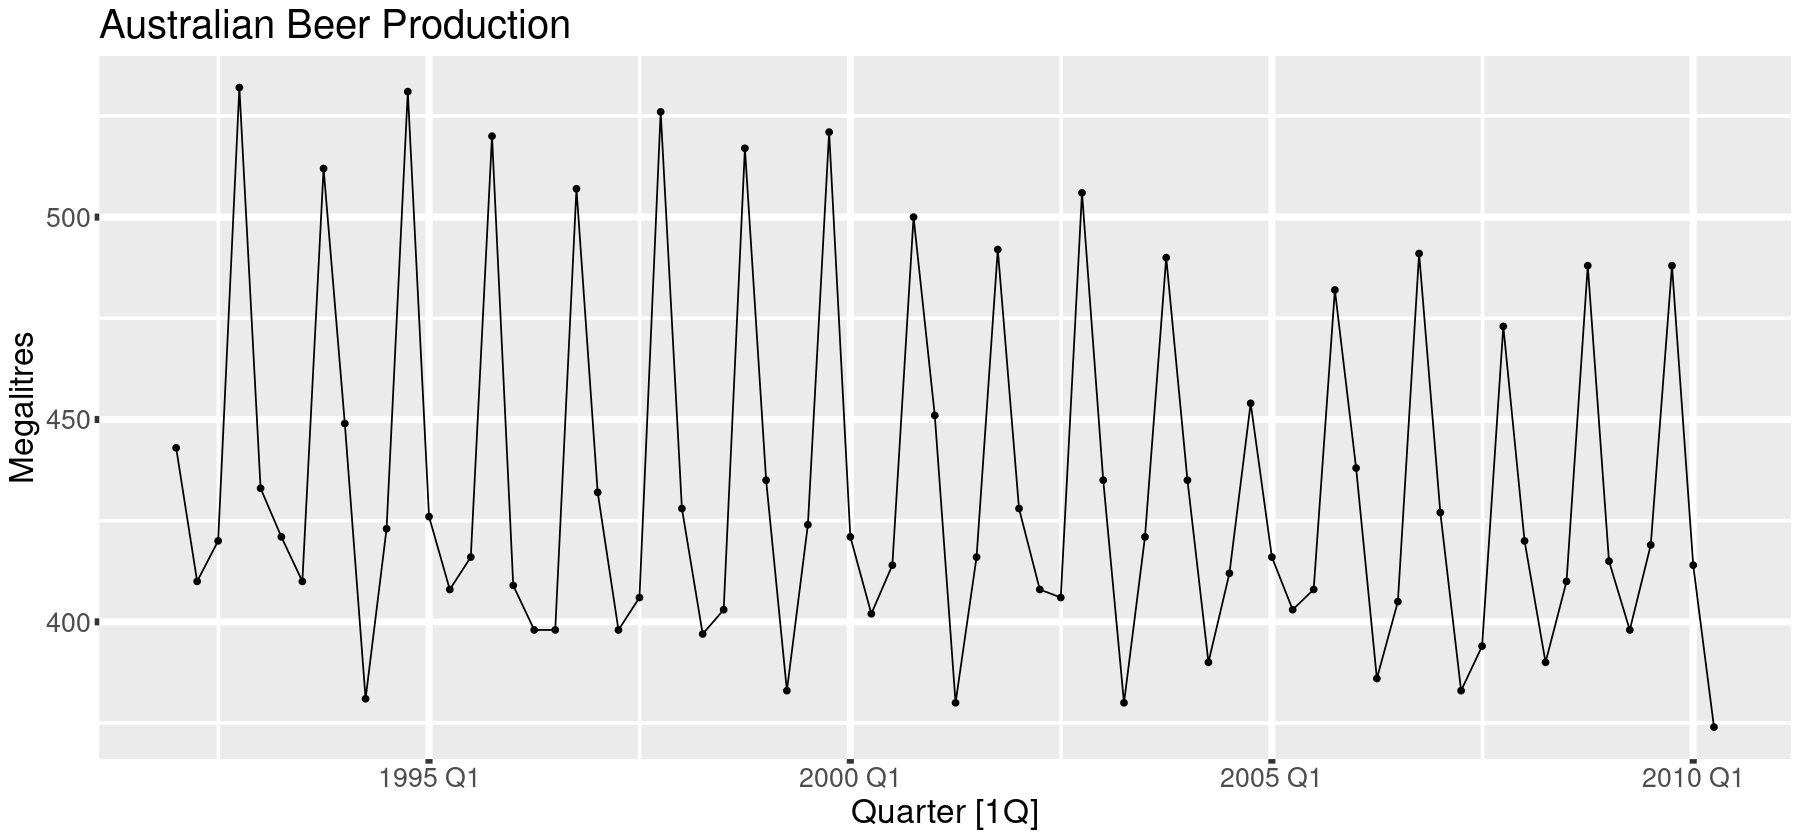

In [150]:
options(repr.plot.width = 15, repr.plot.height = 7)

autoplot(beer_plot, Beer) + geom_point() +
labs(
    title = 'Australian Beer Production',
    y = 'Megalitres'
) +
theme(text = element_text(size = 20), element_line(size = 2))

#### 2.0. Seasonal Plots

In [15]:
vic_ = read.csv("../../../data/vic_elec.csv")
vic_$Time = as.POSIXct(vic_$Time, format="%Y-%m-%d %H:%M:%S")

vic_ = vic_ |> select(Time, Demand, Temperature)
vic_ = vic_[!duplicated(vic_$Time),]

vic_ = vic_ |> as_tsibble(index = Time)

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


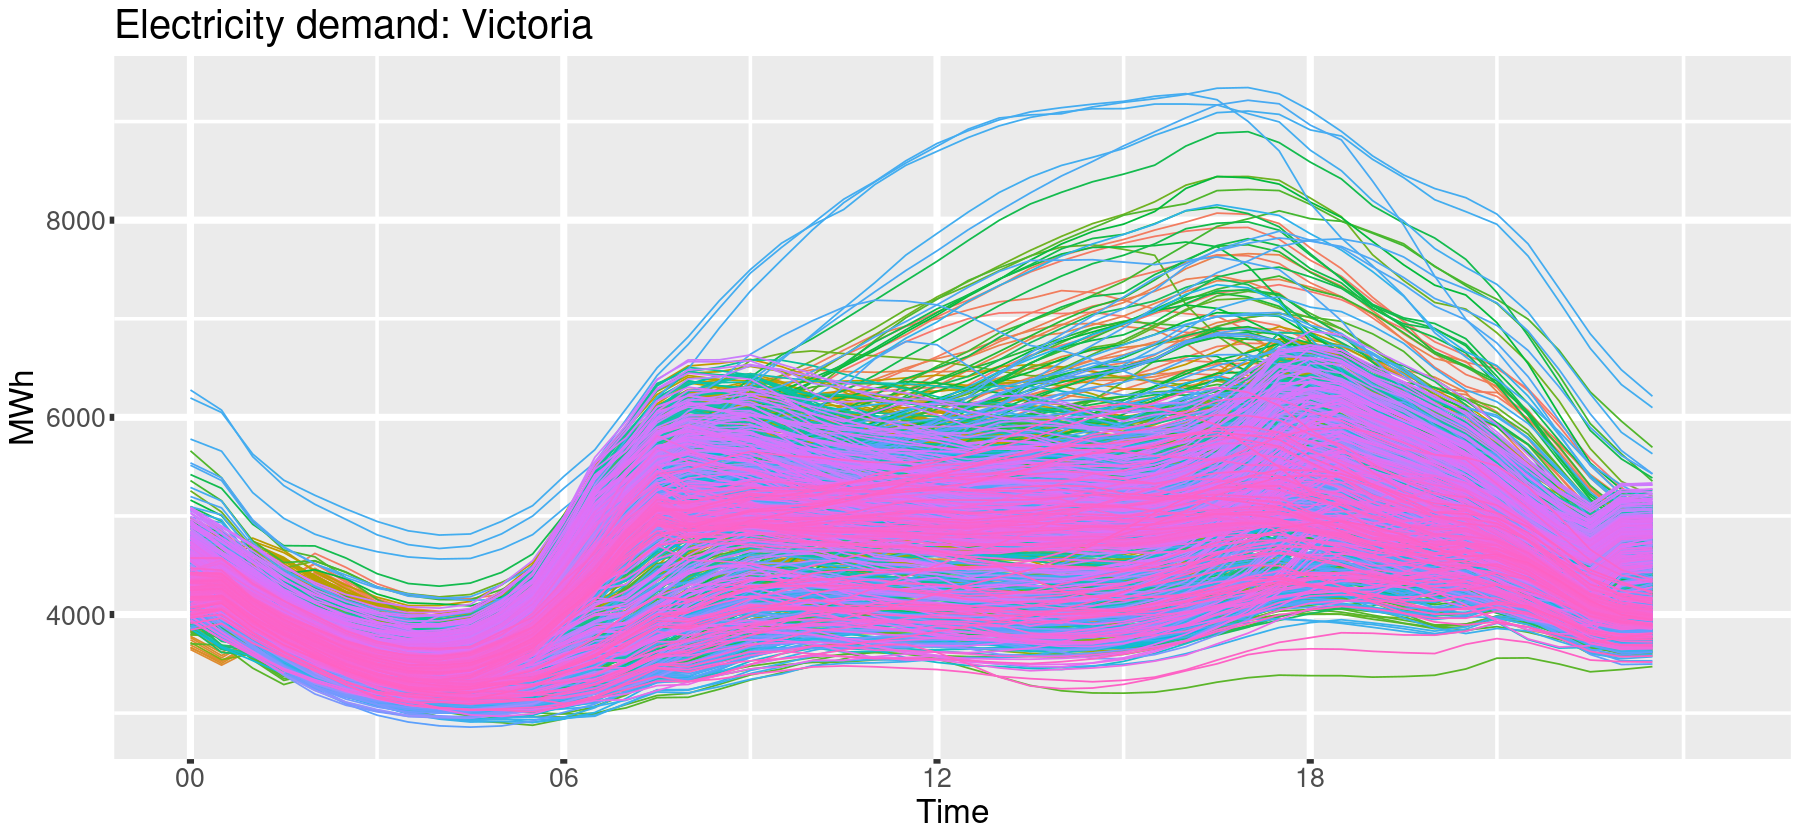

In [164]:
fill_gaps(vic_) |> gg_season(Demand, period = 'day') +
labs(y="MWh", title="Electricity demand: Victoria") +
theme(text = element_text(size = 20), element_line(size = 2), legend.position = "none") 

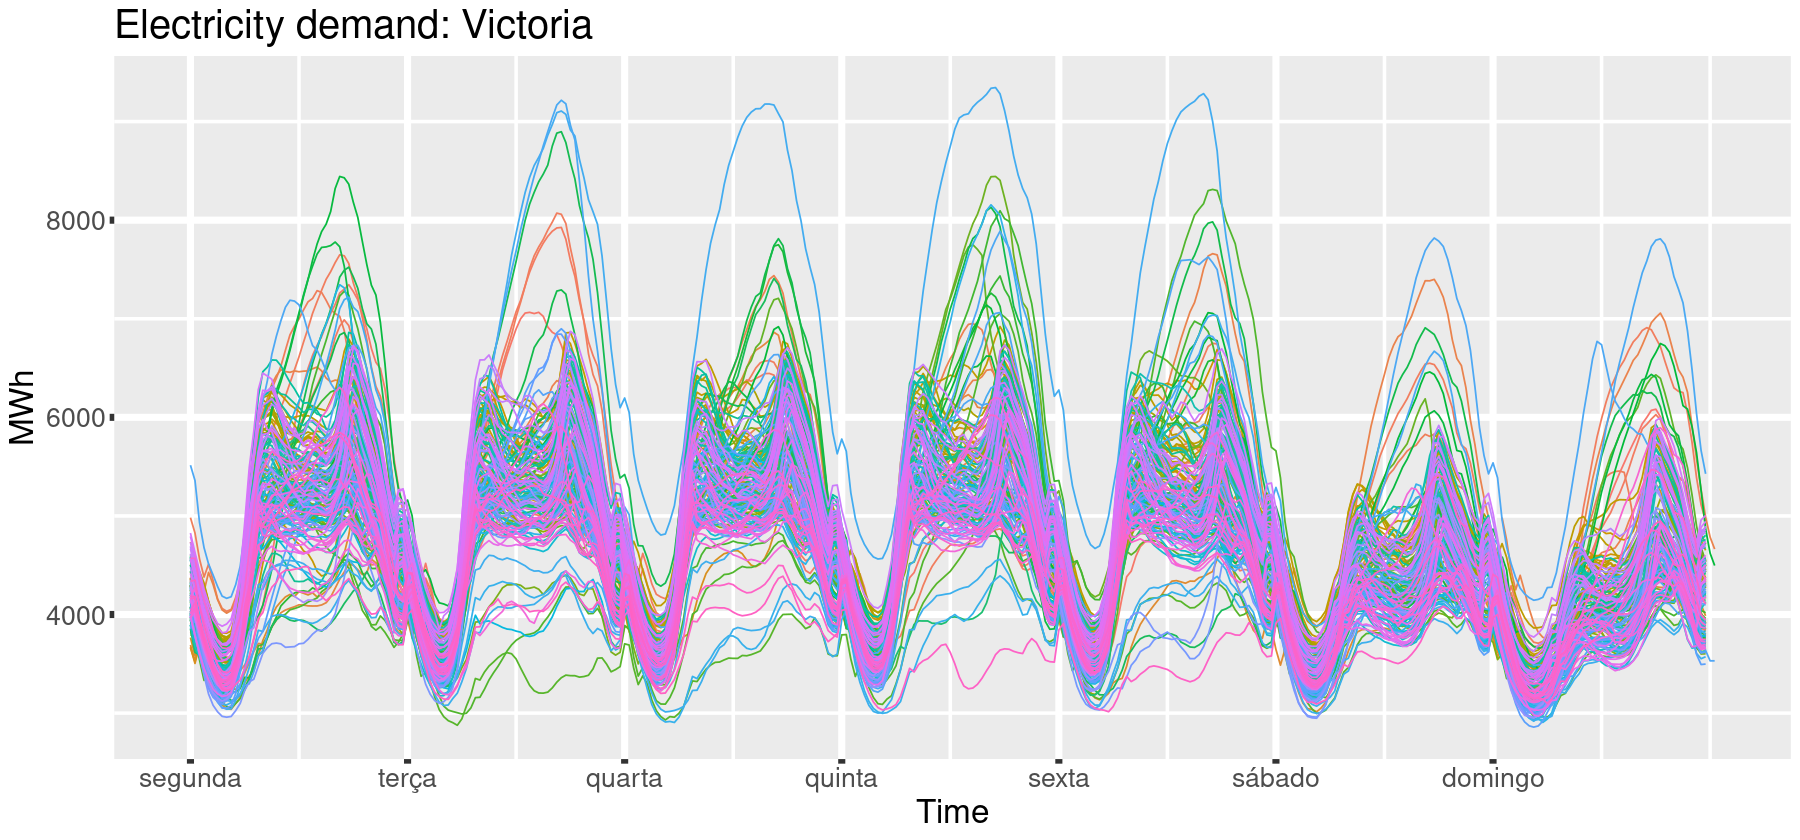

In [140]:
fill_gaps(vic_) |> gg_season(Demand, period = "week") +
labs(y="MWh", title="Electricity demand: Victoria") +
theme(text = element_text(size = 20), element_line(size = 2), legend.position = "none") 

#### 3.0. Subseries & Month Plots

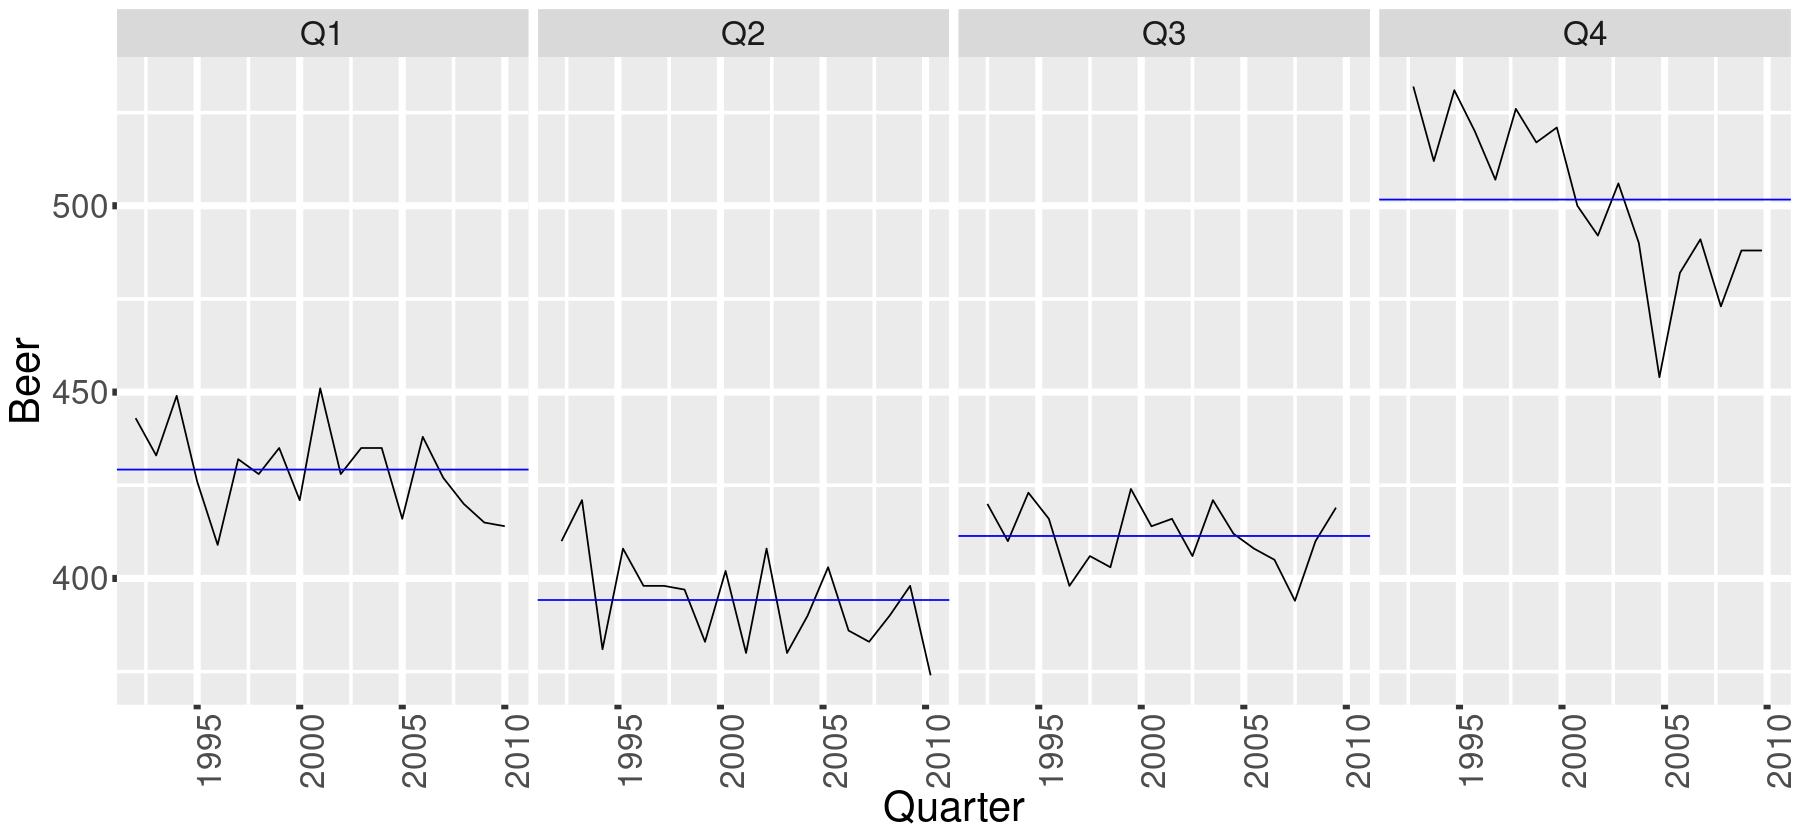

In [155]:
beer_plot |> gg_subseries(Beer) +
theme(text = element_text(size = 25), element_line(size = 2))

#### 4.0. Scatterplots

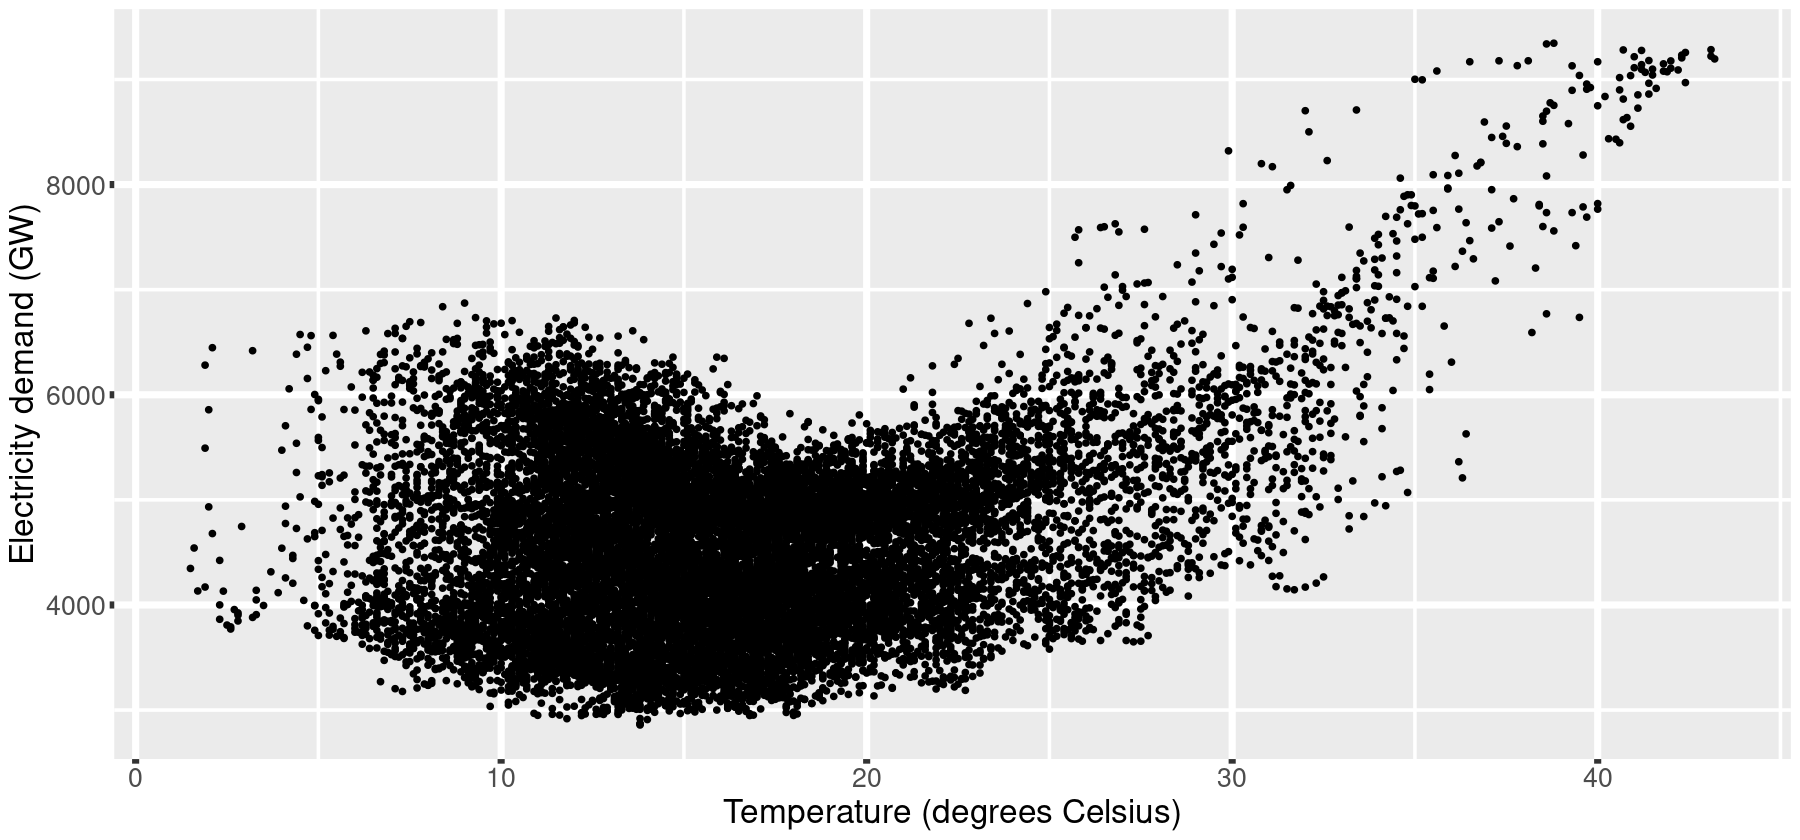

In [168]:
vic_ |> filter(year(Time) == 2014) |>
ggplot(aes(x = Temperature, y = Demand)) + geom_point() +
labs(
  x = "Temperature (degrees Celsius)",
  y = "Electricity demand (GW)"
) +
theme(text = element_text(size = 20), element_line(size = 2))

#### 5.0. Lag Plots

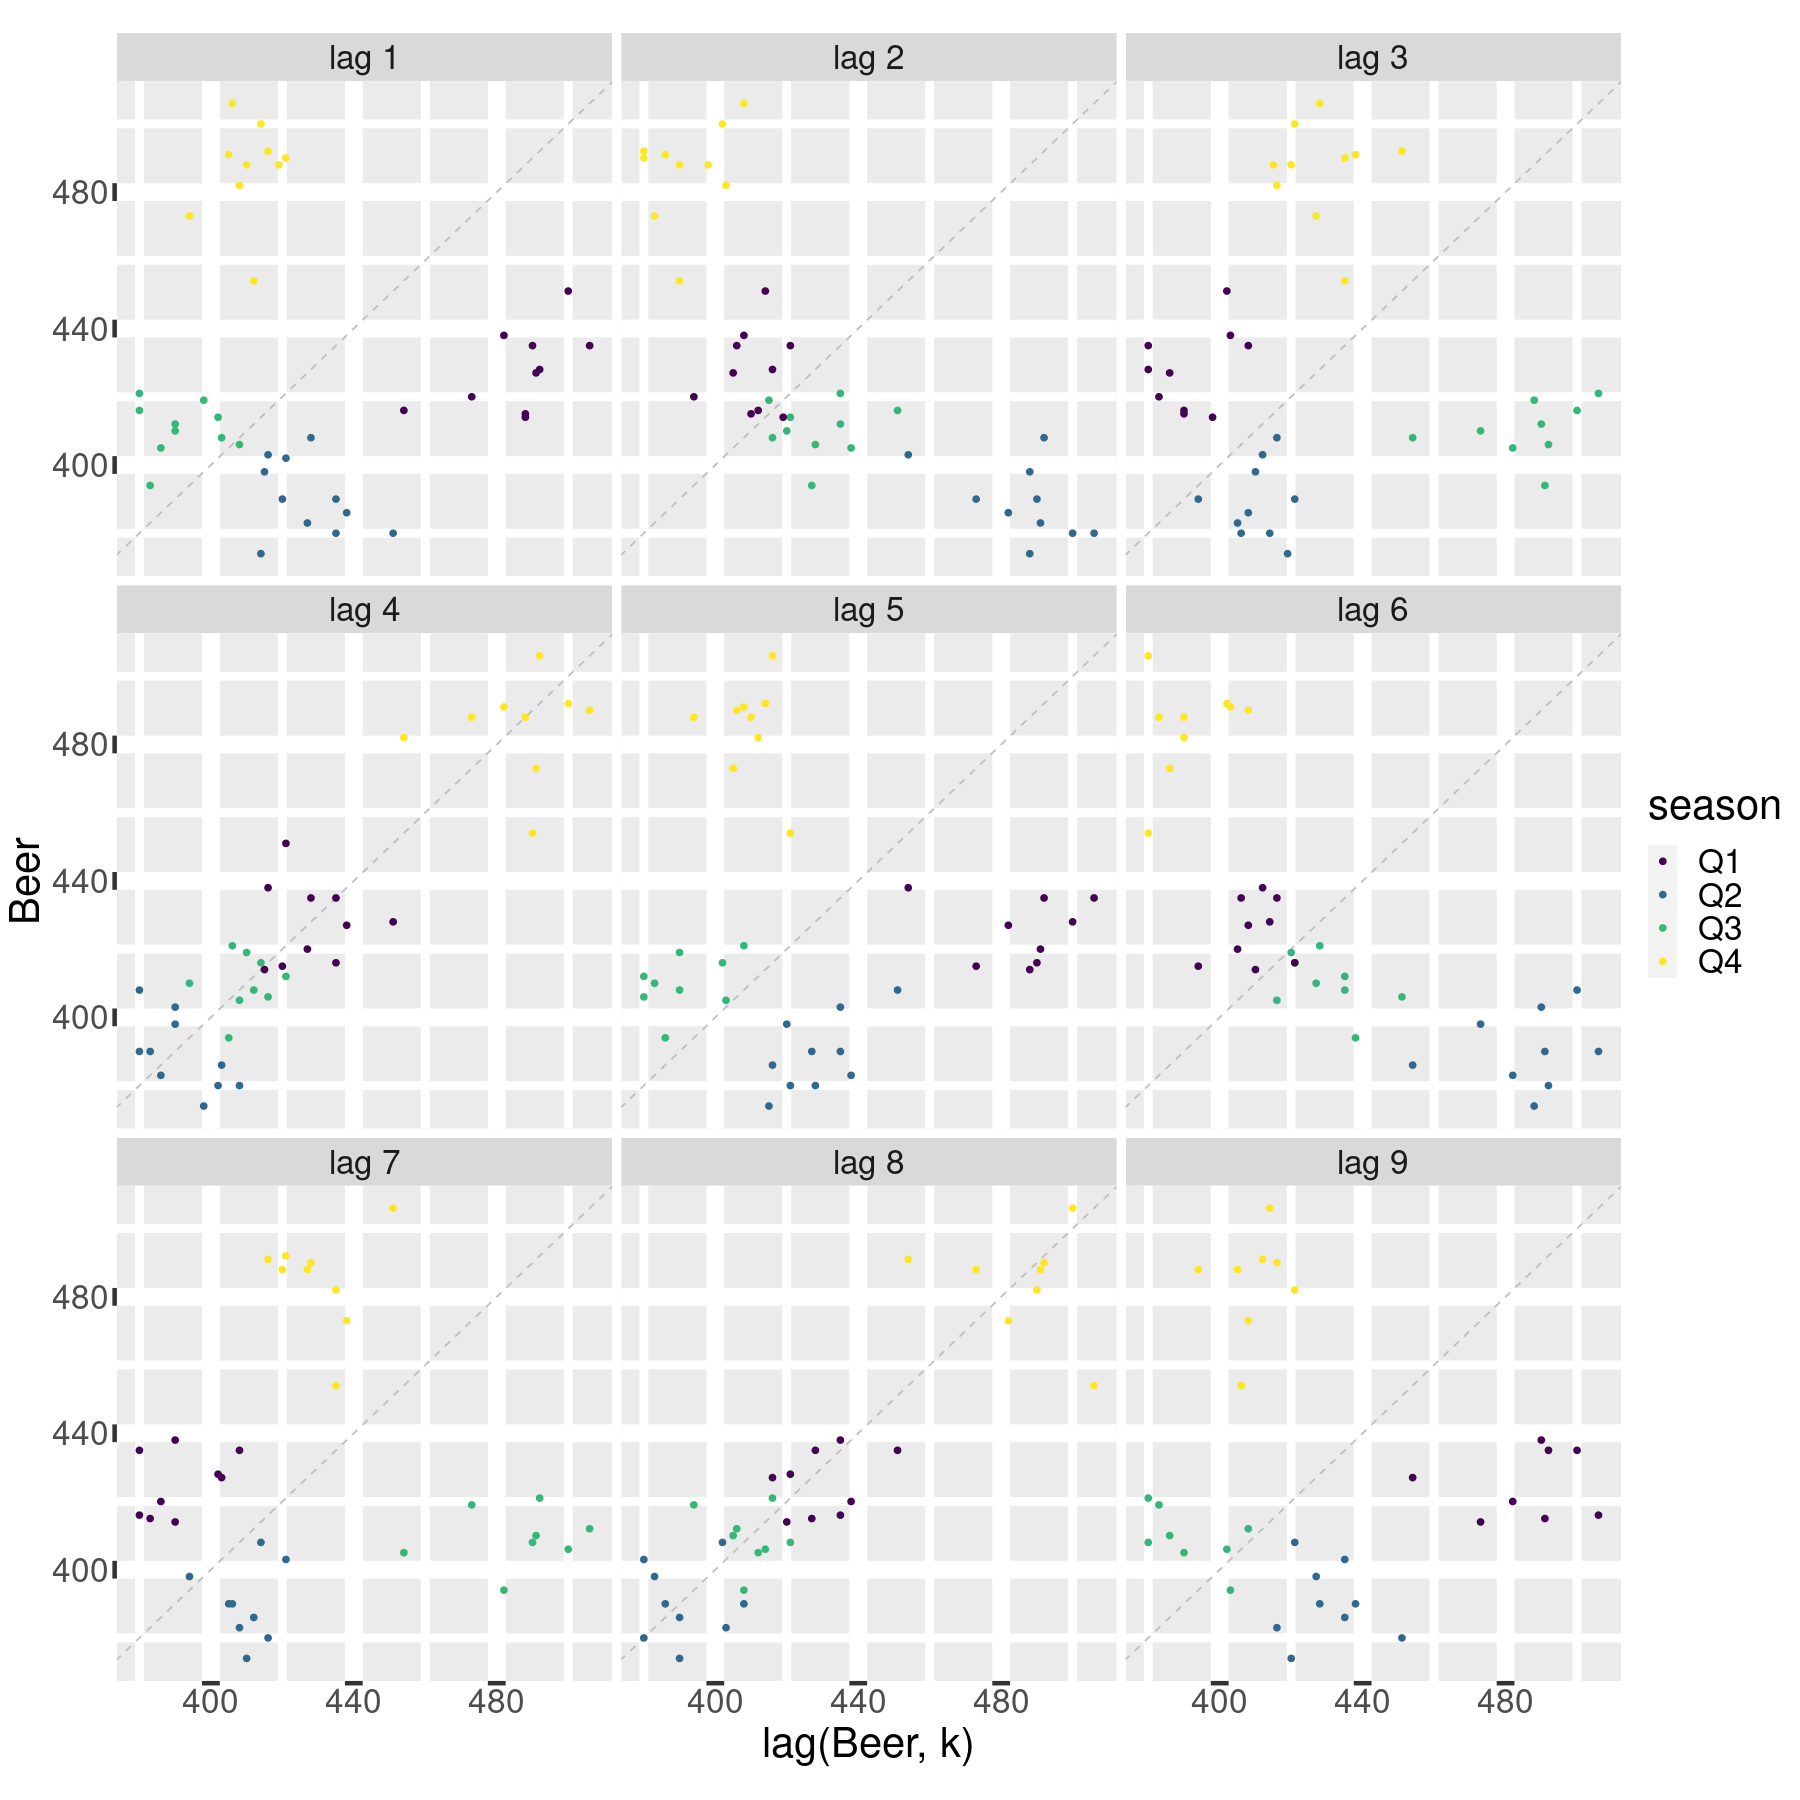

In [190]:
options(repr.plot.width = 15, repr.plot.height = 15)
recent_production <- aus_production |> filter(year(Quarter) >= 2000)
recent_production |> gg_lag(Beer, geom = "point") + labs(x = "lag(Beer, k)") +
theme(text = element_text(size = 25), element_line(size = 5)) 

#### 6.0. Autocorrelation Plots

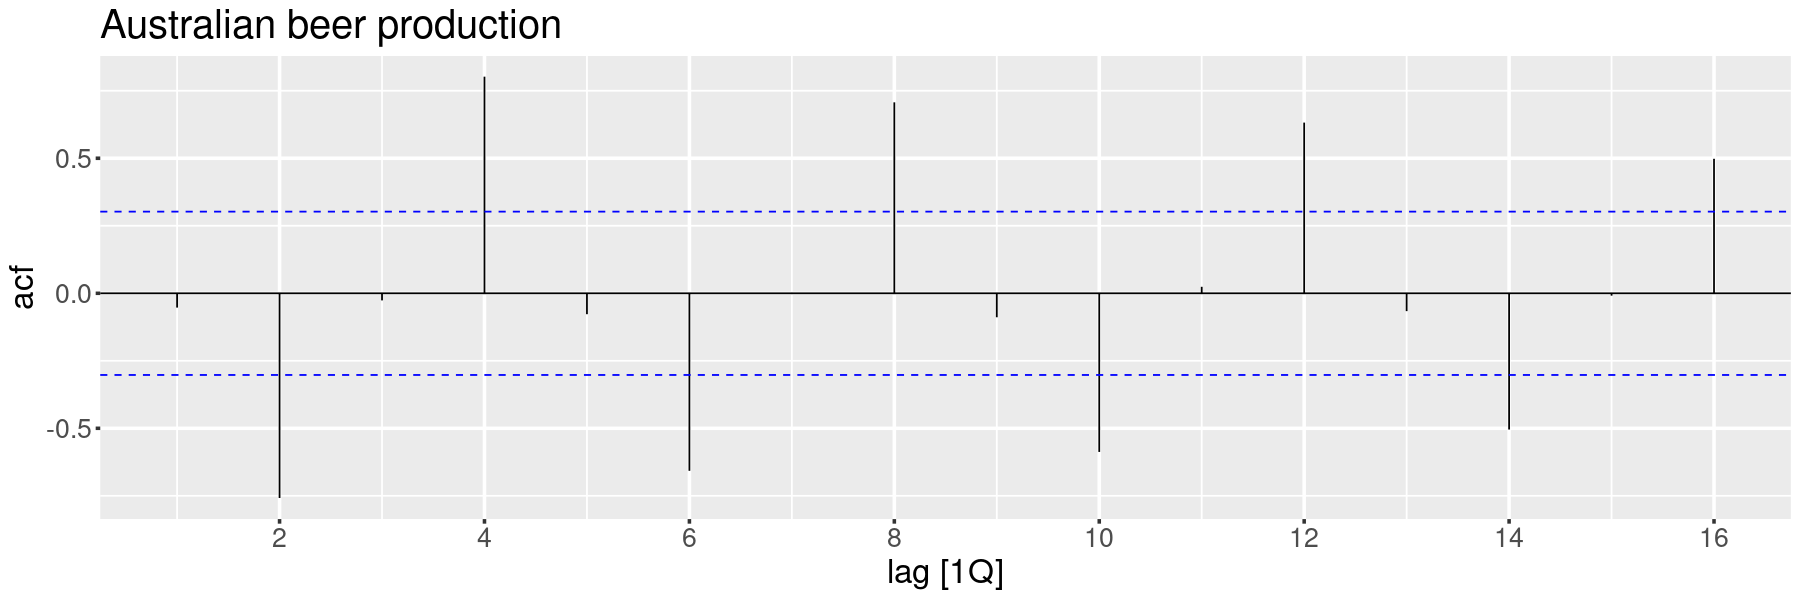

In [194]:
options(repr.plot.width = 15, repr.plot.height = 5)
recent_production |> ACF(Beer) |> autoplot() + labs(title="Australian beer production") +
theme(text = element_text(size = 20), element_line(size = 1)) 

#### 7.0. White Noise

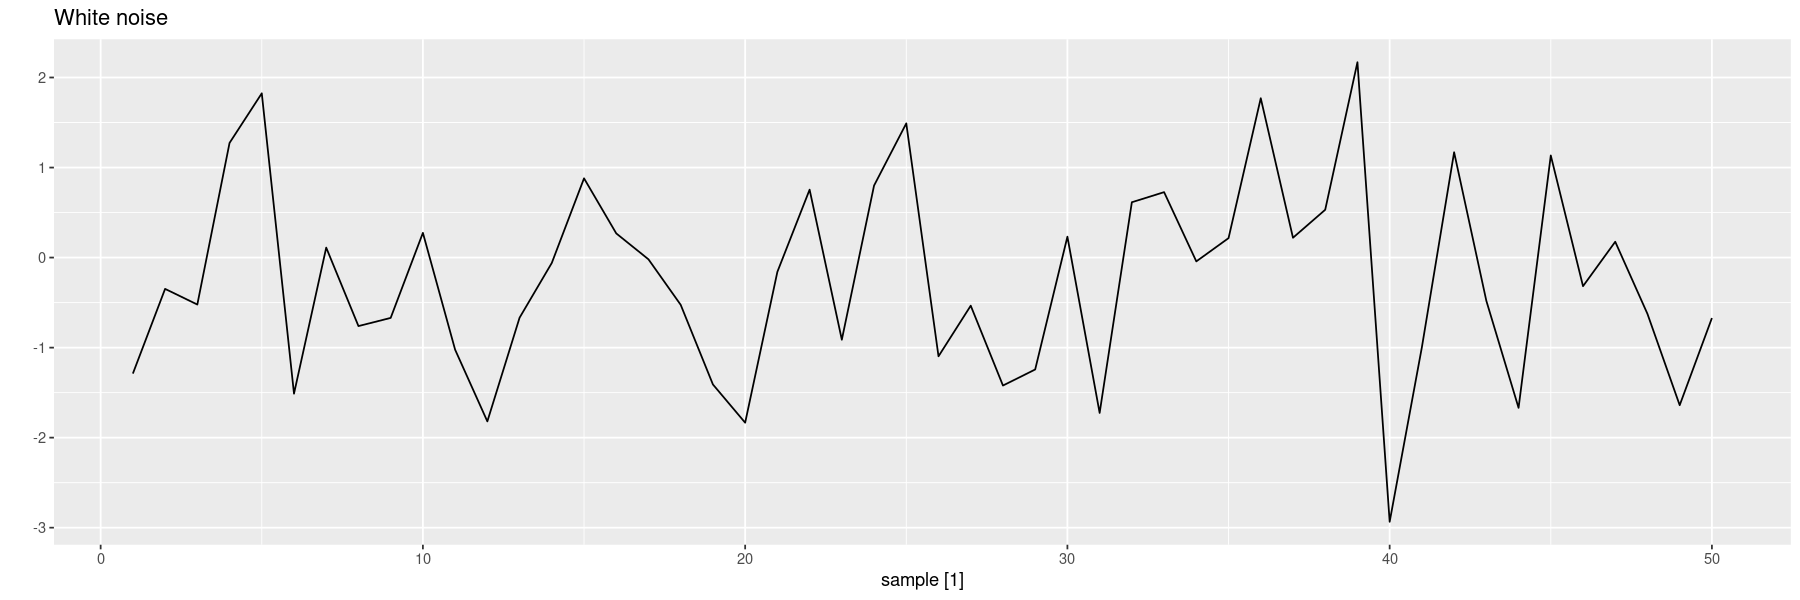

In [195]:
set.seed(30)
y <- tsibble(sample = 1:50, wn = rnorm(50), index = sample)
y |> autoplot(wn) + labs(title = "White noise", y = "")

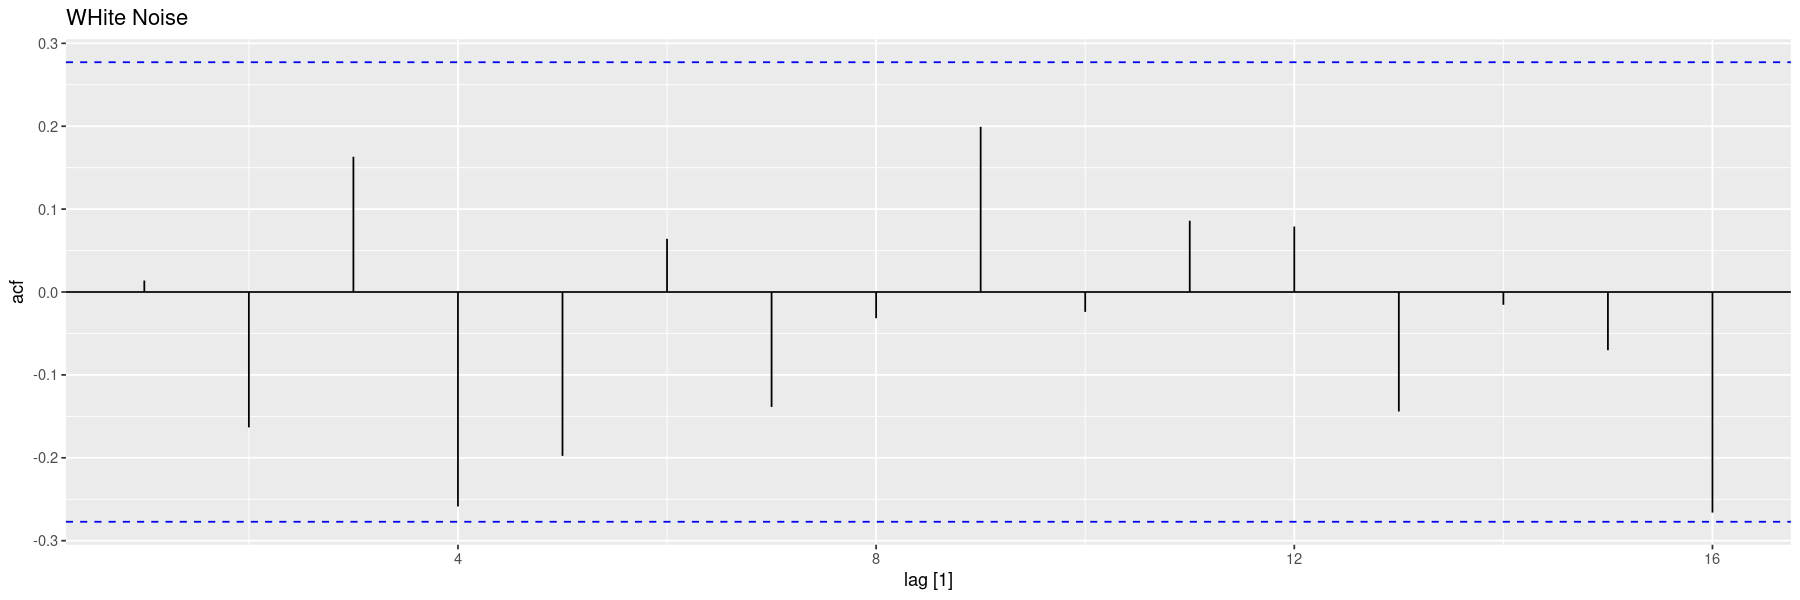

In [197]:
y |> ACF(wn) |> autoplot() + labs(title = "White Noise")